# Milestone 1 - Independent Project

## Author - Taylor Brady



## Instructions

1. Generate a clear statement problem and provide the location for the dataset you use.
2. Provide a clear solution to the problem for a non-technical audience.
3. Visually explore the data to generate insight and include summary statistics.
    - Scatter plots showing key relationships you have found in the dataset. Beware of over-plotting. 
    - bar, box or violin plots for various categorical groups within the dataset. 
    - Faceted plots to show diffences for different groups with in the data. 
    - Other plot types you find useful; heatmaps, histograms, etc. 
    - All plots should use methods that will aid in viewer perception. 

### Note
Please use the <a class="icon-pdf" title="Independent Project Rubric" href="https://library.startlearninglabs.uw.edu/DATASCI410/Handouts/DATASCI%20410%20Independent%20Project%20Rubric.pdf" target="_blank" rel="noopener">Rubric</a> as a general guide for your project.

# Abstract
## Problem
A team of home renovators is intrested in the best indicators of resell value after being renovated.

## Conclusion


In [1]:
# Location of dataset
filename = "./kc_house_data.csv"

In [105]:
# Load necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.cluster import KMeans

data_orig=pd.read_csv(filename)
SHOW_ALL=True

In [148]:
d=data_orig.loc[:,'price':].copy()
#Only ints and floats
#print(d.dtypes)
data_orig.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,2.876566e+09,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [248]:
# Un-comment to display graph that demonstrates why outlier was changed
#showOutlier()
# Corrects *assumed* typo
d.loc[:]['bedrooms'][data_orig.loc[:,'bedrooms']==33]=3
d['fullBaths']=np.round(data_orig.loc[:,'bathrooms'])
d['halfBaths']=(data_orig.loc[:,'bathrooms']-d['fullBaths'])/0.25
d.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,...,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,fullBaths,halfBaths,yr_since
count,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,...,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,5.400881e+05,3.369454,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,...,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652,2.058715,0.224171,46.613982
std,3.671272e+05,0.907964,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,...,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631,0.755524,1.305587,28.806854
min,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,...,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000,0.000000,-2.000000,5.000000
25%,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,...,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000,2.000000,-1.000000,21.000000
50%,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,...,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000,2.000000,0.000000,43.000000
75%,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,...,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000,2.000000,2.000000,66.000000
max,7.700000e+06,11.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,...,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000,8.000000,2.000000,120.000000


In [258]:
## Create new column that combines renovation and built
x=d.loc[:,'yr_renovated'].copy()
x[x==0]=d.loc[:,'yr_built'][x==0]
x=2020-x
d['yr_since']=x

Index(['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long',
       'sqft_living15', 'sqft_lot15', 'fullBaths', 'halfBaths', 'yr_since'],
      dtype='object')


In [260]:
#Normalize attributes
def normm(data):
    data=d.loc[:,col]
    m=data.mean()
    sd=data.std()
    return (data-m)/(sd)

#normalize all
d_norm=d.copy()
for col in d.columns:
    d_norm.loc[:,col]=normm(d.loc[:,col])
    
#bin price
price=d_norm.loc[:,'price']
priceBin=binn(price.copy(),10)   
d['priceBin']=priceBin
d['lotBin']=binn(d.loc[:,'sqft_lot'].copy(),25)
d['livBin']=binn(d.loc[:,'sqft_living'].copy(),25)

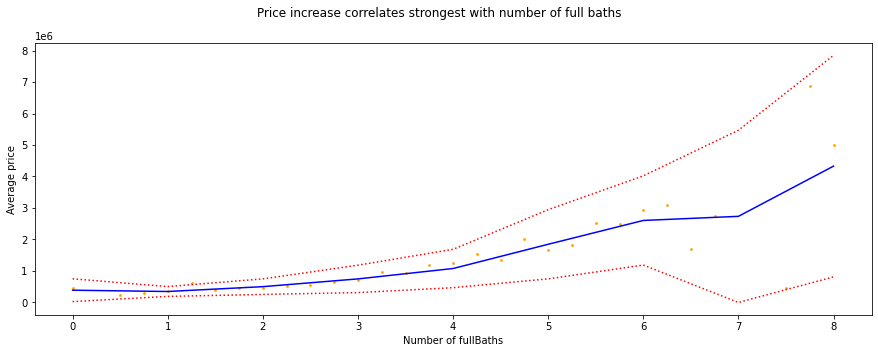

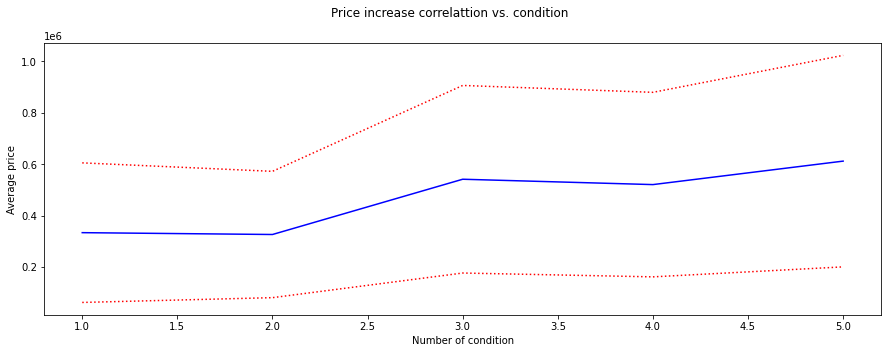

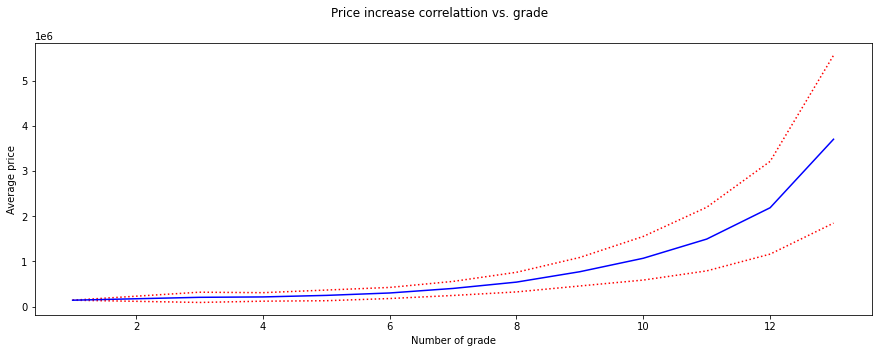

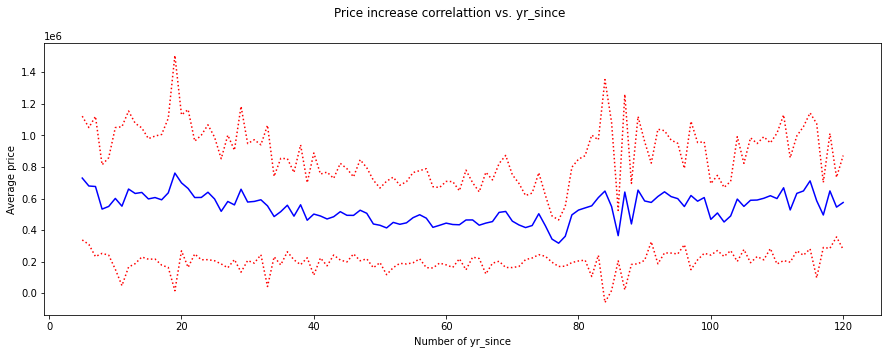

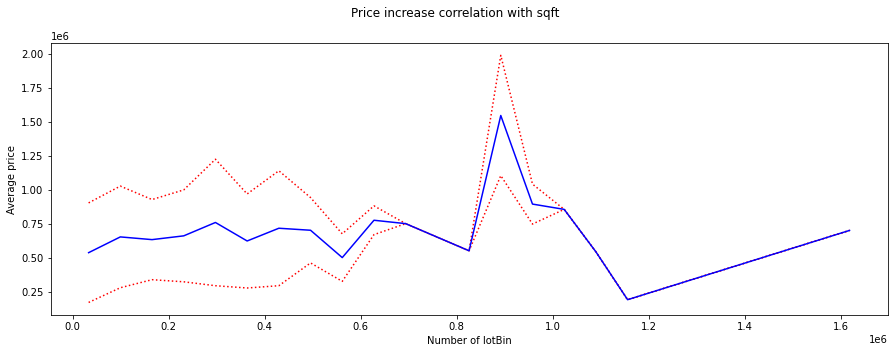

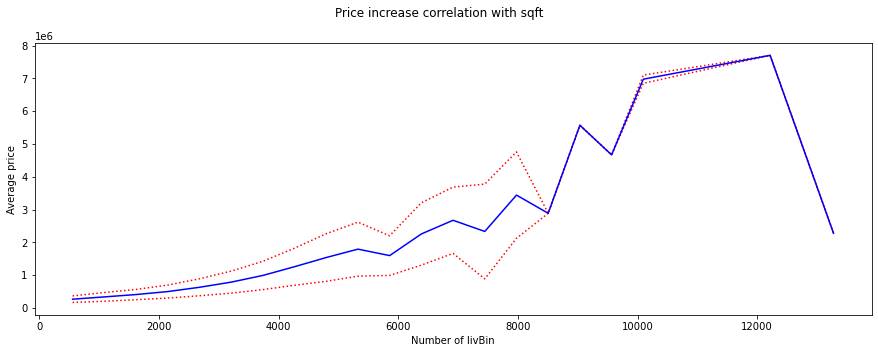

In [264]:
def pltAvg(d,xName,yName,ax,scatter=False):
    x=np.sort(d.loc[:,xName].unique())
    y=x.copy()
    high=x.copy()
    low=x.copy()
    for i in x:
        this = d.loc[:,yName][d.loc[:,xName]==i]
        y[x==i]=this.mean()
        high[x==i]=y[x==i]+this.std()
        low[x==i]=y[x==i]-this.std()
        if this.size==1:
            high[x==i]=y[x==i]
            low[x==i]=y[x==i]
    if scatter==True:
        ax.scatter(x,y,c='orange',s=3)
    else:
        ax.plot(x,high,c='red',linestyle=':')
        ax.plot(x,low,c='red',linestyle=':')
        ax.plot(x,y,c='blue')
    ax.set_xlabel("Number of "+xName)
    ax.set_ylabel("Average "+yName)
#'-', '--', '-.', ':', 'None', ' ', '', 'solid', 'dashed', 'dashdot', 'dotted'

fig=plt.figure(figsize=(15,5))
ax=fig.gca()
pltAvg(d,'bathrooms','price',ax,scatter=True)
pltAvg(d,'fullBaths','price',ax)
fig.suptitle('Price increase correlates strongest with number of full baths')


for h in ['condition', 'grade','yr_since']:
    fig=plt.figure(figsize=(15,5))
    ax=fig.gca()
    pltAvg(d,h,'price',ax)
    fig.suptitle('Price increase correlattion vs. '+h)
for h in ['lotBin','livBin']:
    fig=plt.figure(figsize=(15,5))
    ax=fig.gca()
    pltAvg(d,h,'price',ax)
    fig.suptitle('Price increase correlation with sqft')

In [28]:
#split attributes by house, location/lot, and things we can update
house=['bedrooms', 'bathrooms', 'livBin','floors']
lot=['lotBin','waterfront', 'view','lat','long']
mods=['condition', 'grade','yr_since']

In [342]:
print("Beds",'\t','Baths','\t','Livin','\t','Lot','   \t','Zip','\t','Data Points')
for bd in np.sort(d.loc[:,'bedrooms'].unique()):
    f=d.loc[:,'bedrooms']==bd
    for bth in np.sort(d.loc[:,'fullBaths'][f].unique()):
        f1=f&d.loc[:,'fullBaths']==bth
        for sliv in np.sort(d.loc[:,'livBin'][f1].unique()):
            f2=(f1) & (d.loc[:,'livBin']==sliv)
            for slot in np.sort(d.loc[:,'lotBin'][f2].unique()):
                f3=(f2)&(d.loc[:,'lotBin']==slot)
                for zc in np.sort(d.loc[:,'zipcode'][f3].unique()):
                    f4=(f3)&(d.loc[:,'zipcode']==zc)
                    #print(bd,'\t',int(bth),'\t',int(sliv),'\t',int(slot),'  \t',zc,'\t',d.loc[:,'lotBin'][f4].size)
                    if d.loc[:,'condition'][f4].unique().size>1:
                        for c in np.sort(d.loc[:,'condition'][f4].unique()):
                            f5=(f4)&(d.loc[:,'condition']==c)
                            print(c,'  ',d.loc[:,'price'][f5].mean())
        

Beds 	 Baths 	 Livin 	 Lot    	 Zip 	 Data Points
4    141850.0
5    150000.0
3    398000.0
4    330000.0
2    80000.0
3    207333.33333333334
4    150000.0
3    75000.0
5    206125.0
1    142000.0
3    225000.0
4    340000.0
3    330000.0
4    189000.0
3    180000.0
5    350000.0
3    129000.0
4    100000.0
3    145000.0
4    285000.0
4    129000.0
5    176000.0
2    280000.0
4    286000.0
3    224850.0
4    200500.0
5    220000.0
4    187850.0
5    194692.14285714287
3    235985.0
4    182349.6
5    199000.0
3    390000.0
4    353500.0
4    290000.0
5    369900.0
3    407500.0
4    401462.5
2    275000.0
3    307710.0
4    342666.6666666667
5    336500.0
1    125000.0
3    219478.0
4    231428.57142857142
5    300000.0
3    408635.71428571426
4    398333.3333333333
5    402250.0
2    425000.0
3    245000.0
4    266000.0
2    480000.0
3    284158.5
3    373268.3076923077
4    384500.0
5    392800.0
1    252000.0
3    346000.0
4    414683.3333333333
2    290000.0
3    366773.5294117647

3    381157.96
4    371048.28205128206
5    403015.7894736842
2    313000.0
3    338850.0
4    350690.3846153846
5    309743.625
2    253975.0
3    245827.5
4    257676.66666666666
5    294861.0
3    450651.39024390245
4    451745.2380952381
5    574981.3333333334
3    273158.94444444444
4    287200.0
5    317221.4285714286
3    257088.63636363635
4    269787.5
5    253000.0
2    269500.0
3    258318.46153846153
4    270777.77777777775
5    327708.0
3    573915.7142857143
4    597087.5
5    638422.1111111111
3    412475.0
4    301330.0
5    358000.0
3    427000.0
4    356666.6666666667
5    550388.0
3    220000.0
4    759600.0
3    338977.6666666667
4    365000.0
5    354800.0
2    365000.0
3    439000.0
2    450000.0
3    360000.0
4    389900.0
3    201000.0
4    335000.0
3    520000.0
4    477500.0
3    555000.0
4    700000.0
3    450000.0
4    585000.0
2    170000.0
3    350000.0
4    369000.0
2    370000.0
3    306000.0
2    280000.0
3    300000.0
3    385000.0
4    650000.0
3    3

4    456000.0
3    649500.0
4    650000.0
3    820000.0
4    775000.0
5    695000.0
3    514250.0
4    435000.0
3    534250.0
4    450000.0
3    819000.0
5    520000.0
3    452500.0
4    549900.0
5    579950.0
3    569950.0
4    859000.0
3    463108.3333333333
4    409000.0
3    451900.0
4    570833.3333333334
3    1327844.705882353
4    1499626.6666666667
3    895110.6666666666
4    828550.0
5    950375.0
3    946048.0975609756
4    986750.0
5    1032629.1666666666
3    950833.3333333334
4    793540.0
3    921937.5
4    734958.3333333334
5    770000.0
3    633500.0
4    430466.6666666667
3    612059.1176470588
5    600000.0
3    607765.0
4    720000.0
3    411333.3333333333
4    394999.5
3    414892.0740740741
4    357249.77777777775
2    580000.0
3    748936.8823529412
4    647570.8333333334
5    707500.0
3    661926.6666666666
4    679500.0
5    605000.0
3    756240.1785714285
4    685000.0
5    697500.0
3    395902.0833333333
4    465000.0
3    451778.5714285714
4    409750.0
5    

3    382945.8333333333
4    409200.0
5    416833.3333333333
2    201500.0
3    264933.0
4    314234.0
5    336652.5
2    338500.0
3    311661.1111111111
4    380000.0
1    295000.0
3    278810.0
4    299950.0
5    282590.0
3    259258.33333333334
4    274546.0
5    341750.0
2    310000.0
3    348555.55555555556
4    337000.0
3    357000.0
4    230000.0
5    245000.0
1    255000.0
2    239250.0
3    164547.5
4    235000.0
5    310950.0
3    255122.72727272726
4    267466.6666666667
5    270500.0
3    207689.66666666666
4    308091.6666666667
5    153000.0
1    79500.0
2    82500.0
3    153946.42857142858
4    203770.83333333334
5    189083.33333333334
3    355000.0
4    500000.0
2    170000.0
3    178499.2857142857
4    220750.0
3    150740.0
4    197000.0
3    385000.0
4    419000.0
5    510000.0
2    240000.0
3    193367.22222222222
4    201525.14814814815
5    185166.66666666666
3    196261.875
4    193171.73913043478
5    203538.33333333334
3    196039.12
4    225987.5
5    232500.0

4    449565.0
5    481294.23076923075
3    377536.6296296296
4    407293.78846153844
5    395928.2173913043
3    482111.73076923075
4    528083.3333333334
5    540687.5
2    333000.0
3    439255.4347826087
4    547960.0
5    524816.6666666666
3    293269.6666666667
4    358384.6153846154
5    322166.6666666667
3    286675.0
4    307333.3333333333
5    289475.0
2    420550.0
3    381157.96
4    371048.28205128206
5    403015.7894736842
2    313000.0
3    338850.0
4    350690.3846153846
5    309743.625
2    253975.0
3    245827.5
4    257676.66666666666
5    294861.0
3    450651.39024390245
4    451745.2380952381
5    574981.3333333334
3    273158.94444444444
4    287200.0
5    317221.4285714286
3    257088.63636363635
4    269787.5
5    253000.0
2    269500.0
3    258318.46153846153
4    270777.77777777775
5    327708.0
3    573915.7142857143
4    597087.5
5    638422.1111111111
3    412475.0
4    301330.0
5    358000.0
3    427000.0
4    356666.6666666667
5    550388.0
3    220000.0
4 

3    649500.0
4    650000.0
3    820000.0
4    775000.0
5    695000.0
3    514250.0
4    435000.0
3    534250.0
4    450000.0
3    819000.0
5    520000.0
3    452500.0
4    549900.0
5    579950.0
3    569950.0
4    859000.0
3    463108.3333333333
4    409000.0
3    451900.0
4    570833.3333333334
3    1327844.705882353
4    1499626.6666666667
3    895110.6666666666
4    828550.0
5    950375.0
3    946048.0975609756
4    986750.0
5    1032629.1666666666
3    950833.3333333334
4    793540.0
3    921937.5
4    734958.3333333334
5    770000.0
3    633500.0
4    430466.6666666667
3    612059.1176470588
5    600000.0
3    607765.0
4    720000.0
3    411333.3333333333
4    394999.5
3    414892.0740740741
4    357249.77777777775
2    580000.0
3    748936.8823529412
4    647570.8333333334
5    707500.0
3    661926.6666666666
4    679500.0
5    605000.0
3    756240.1785714285
4    685000.0
5    697500.0
3    395902.0833333333
4    465000.0
3    451778.5714285714
4    409750.0
5    385000.0
3    

4    279975.0
2    250000.0
4    215000.0
3    193250.0
4    272500.0
2    80000.0
3    207333.33333333334
4    150000.0
3    75000.0
5    227250.0
1    142000.0
3    205000.0
4    340000.0
3    186500.0
4    140000.0
3    341200.0
4    335000.0
5    336500.0
1    125000.0
3    204271.42857142858
4    295000.0
5    300000.0
3    369500.0
4    290000.0
3    175000.0
4    267000.0
1    252000.0
3    334666.6666666667
2    290000.0
3    327960.0
4    358430.0
5    276000.0
2    191833.33333333334
3    254714.2857142857
4    221250.0
3    364250.0
4    202000.0
1    295000.0
2    110000.0
3    312500.0
4    330000.0
5    235000.0
3    264000.0
4    403500.0
2    310000.0
3    295000.0
4    229050.0
3    341949.1666666667
4    230000.0
2    235000.0
3    175712.5
2    250000.0
3    190000.0
4    225000.0
2    240000.0
3    198687.33333333334
4    193989.57692307694
5    210500.0
3    191800.0
4    197490.0
5    211707.14285714287
3    199698.75
4    216435.0
5    240000.0
3    778688.888888

4    574917.125
5    651142.8571428572
3    469350.0
4    397850.0
5    354000.0
3    468920.37209302327
4    468515.625
5    433400.0
3    433969.3
4    447666.6666666667
3    412215.13157894736
4    260000.0
3    300889.28571428574
4    299971.0
5    380249.75
2    268000.0
3    296464.2428571429
4    282034.2909090909
3    597613.5
4    517177.0
5    533333.3333333334
3    463145.3620689655
4    456750.8181818182
5    446000.0
3    577114.6585365854
4    592194.7368421053
3    314259.72
4    293497.36842105264
3    321973.3333333333
4    300752.26923076925
5    298712.5
3    282581.92307692306
4    290166.5625
5    320000.0
2    429000.0
3    628372.3333333334
4    680512.1212121212
5    668355.5555555555
3    490972.2298850575
4    472235.3658536585
5    500750.0
3    348716.64285714284
4    334177.2727272727
5    344390.0
3    1275000.0
4    1310000.0
2    711500.0
3    773791.6666666666
4    814552.9411764706
5    916266.8888888889
2    290000.0
3    318170.9183673469
4    354745

3    985179.4583333334
4    949680.0
5    1039750.0
3    1085131.8181818181
4    884000.0
5    1110000.0
3    1056300.0
5    1035000.0
3    656308.3333333334
5    666500.0
3    1715600.0
4    1162000.0
5    1010000.0
1    432500.0
3    870200.0
4    1632500.0
5    1271200.0
3    603750.0
4    700000.0
5    687000.0
3    815650.0
4    840000.0
5    530000.0
3    560740.0
4    549713.25
5    650050.0
3    893950.0
4    632500.0
5    756450.0
3    1096316.6666666667
4    931787.5
5    984875.0
3    659750.0
4    873650.0
5    549900.0
3    716192.3076923077
4    755000.0
5    911100.0
3    630903.8461538461
4    664295.0
5    947500.0
3    820733.3333333334
4    1035888.8888888889
3    690131.25
4    446250.0
5    380000.0
3    573857.1428571428
4    684487.5
5    455250.0
3    1196714.5
4    1121500.0
5    1210750.0
3    639900.0
4    625000.0
3    599375.0
4    540000.0
3    1225000.0
5    735000.0
3    576500.0
5    785000.0
3    726533.3333333334
4    753000.0
5    1140000.0
3    7590

2    325000.0
3    419194.76923076925
4    484666.6666666667
5    555000.0
2    461000.0
3    438753.68852459016
4    466705.76923076925
5    483991.6666666667
2    182501.25
3    319089.0
4    347988.9090909091
5    269333.3333333333
3    526563.1578947369
4    582666.6666666666
5    693000.0
3    451994.5945945946
4    557500.0
3    334502.7027027027
4    404833.3333333333
5    306000.0
2    370000.0
3    307770.1388888889
4    393898.75
5    386750.0
3    301515.6666666667
4    309597.9166666667
5    367075.0
1    658000.0
3    374919.7428571429
4    428133.3333333333
5    396500.0
2    271310.0
3    352769.92
4    388277.77777777775
2    104950.0
3    222976.31578947368
4    338890.0
5    303000.0
1    275250.0
2    250750.0
3    228600.0
4    244000.0
1    305000.0
3    289946.26923076925
4    329717.7272727273
5    314079.0
2    105000.0
3    193416.66666666666
4    265600.0
2    210000.0
3    211851.66666666666
4    203868.75
5    215375.0
3    376308.5714285714
4    400150.0
2 

3    462431.30303030304
4    480100.0
5    515000.0
2    175000.0
3    259388.63636363635
4    257411.36363636365
3    257946.13157894736
4    253388.85714285713
5    304247.5
3    240165.38461538462
4    261040.9090909091
5    249000.0
3    532172.34375
4    546068.8333333334
5    675916.6666666666
2    475000.0
3    424937.8210526316
4    426965.0
5    450815.0
3    292689.1743119266
4    269498.6666666667
5    307400.0
3    698000.0
4    785635.7142857143
5    680000.0
2    205000.0
3    267110.0
4    263164.7727272727
5    277180.0
2    235333.33333333334
3    359036.84210526315
4    347583.3333333333
5    240000.0
3    477239.7291666667
4    488802.0967741936
5    530000.0
3    450246.8703703704
4    428000.0
3    286727.02702702704
4    282639.5833333333
5    257000.0
3    319667.39130434784
4    321540.3846153846
5    367123.5294117647
2    315001.0
3    301759.57446808513
4    307774.6875
5    297557.14285714284
3    327578.0
4    316388.7878787879
5    371500.0
3    383301.656

3    649500.0
4    650000.0
4    775000.0
5    695000.0
3    579000.0
4    435000.0
3    1587842.5
4    1600000.0
3    1052500.0
4    849950.0
5    851500.0
3    945333.3333333334
4    1055150.0
5    855000.0
3    1149666.6666666667
4    627500.0
3    530000.0
4    720000.0
3    340000.0
4    329999.0
3    470061.1111111111
4    430000.0
2    580000.0
3    527500.0
4    654950.0
5    835000.0
3    742285.7142857143
5    735000.0
3    845750.0
4    1185000.0
5    1085000.0
3    1218280.6666666667
4    715000.0
5    959000.0
3    509816.3333333333
4    500000.0
3    1412666.6666666667
4    1849000.0
3    495000.0
4    375000.0
3    830863.6363636364
4    745000.0
3    545079.2857142857
4    477000.0
3    478300.0
4    500000.0
5    430000.0
4    496000.0
5    665000.0
3    699800.0
4    790000.0
3    765325.0
4    900000.0
3    908037.75
4    717816.6666666666
3    747184.375
4    671625.0
3    350000.0
4    438500.0
3    1367183.3333333333
4    1185000.0
5    1690000.0
3    1325000.0
4 

2    160000.0
3    650000.0
4    310000.0
5    450000.0
3    234000.0
4    350000.0
2    210200.0
3    245833.83636363636
4    244058.58620689655
5    234212.5
3    262940.0
4    239904.90476190476
5    209500.0
3    250843.94642857142
4    254564.3125
5    253400.0
3    796625.0
4    866523.8095238095
5    936062.5
3    573741.6666666666
4    558061.75
5    691883.3333333334
1    380000.0
3    452100.0
4    493503.5
5    520009.0909090909
3    470678.5714285714
4    472541.0588235294
3    494837.5
4    510495.74074074073
5    597750.0
3    286462.75
4    319895.45454545453
5    366214.6666666667
3    422218.3333333333
4    399250.0
5    425000.0
3    352173.8695652174
4    285000.0
3    333928.18604651163
4    321333.3333333333
5    375000.0
3    254553.63636363635
4    261032.6923076923
5    235000.0
2    202200.0
3    244790.95652173914
4    255712.2641509434
5    221666.66666666666
3    380312.5
4    305000.0
5    439900.0
3    445373.0
4    426397.0
5    440112.5
1    196000.0
3  

3    371983.3333333333
4    322000.0
5    355000.0
3    362870.0
4    322750.0
3    832596.1538461539
4    835526.1666666666
5    723666.6666666666
3    739616.6666666666
4    531906.25
5    795000.0
3    411864.60714285716
4    653000.0
4    1611000.0
5    1516375.0
3    971904.0
4    957220.0
5    1100000.0
3    362097.36842105264
4    393960.76923076925
2    1200000.0
3    710065.46
4    855722.2222222222
3    404921.4285714286
4    348980.0
5    359000.0
3    545437.5
4    392128.5714285714
5    499500.0
3    402860.8695652174
4    392366.6666666667
5    426237.5
3    527915.2
4    399111.1111111111
3    521570.8965517241
4    358000.0
3    590000.0
4    617666.6666666666
5    1350000.0
3    580699.2857142857
4    552800.0
3    706600.0
4    767500.0
5    1077500.0
3    791413.0
4    979209.5
5    700000.0
3    636475.0
4    609250.0
5    600000.0
3    346424.75
4    358125.0
5    305000.0
3    1137100.0
4    1076000.0
3    902128.5714285715
4    926000.0
5    1005666.6666666666
3 

2    269950.0
3    238783.25
4    249000.0
5    199900.0
3    221800.0
4    219800.0
5    249475.0
3    259812.5
4    240508.33333333334
2    425000.0
4    727250.0
5    1000000.0
3    601250.0
5    800500.0
3    489750.0
4    446207.14285714284
5    425000.0
4    495211.1111111111
5    525000.0
3    495336.6666666667
4    472654.54545454547
5    585000.0
3    381000.0
4    465000.0
2    375000.0
3    363842.85714285716
3    270800.0
4    291333.3333333333
5    228316.66666666666
3    247007.14285714287
4    242243.75
5    263000.0
3    430000.0
4    382500.0
3    382678.44444444444
4    491870.0
3    388708.3333333333
4    402450.0
3    272261.70588235295
4    250765.7142857143
3    278530.0
4    275898.21428571426
5    283000.0
3    247800.0
4    248342.85714285713
5    250000.0
3    492812.5
4    573375.0
5    637250.0
3    417000.0
4    419031.46153846156
5    455000.0
3    310601.63333333336
4    274350.0
5    286000.0
3    610000.0
4    675000.0
3    272448.07692307694
4    22677

4    460000.0
3    403386.3333333333
4    339799.6
3    797854.16
4    601400.0
5    643750.0
3    593827.7777777778
4    590000.0
5    605000.0
3    761436.25
4    760000.0
5    660000.0
3    444265.0
4    465000.0
3    448241.6666666667
4    350000.0
5    385000.0
3    966750.0
4    1111000.0
5    860000.0
2    950000.0
3    749226.4705882353
4    1049285.7142857143
5    1087500.0
3    1410000.0
4    1900000.0
3    1205100.0
4    1120900.0
5    1731250.0
3    420613.3333333333
4    423993.75
3    805224.98
4    718500.0
3    735436.6666666666
4    720500.0
3    464900.0
5    578000.0
3    631781.0666666667
4    505000.0
5    584333.3333333334
3    487937.5
4    469900.0
3    612962.3
4    611500.0
3    710277.7777777778
4    825487.5
3    763147.5555555555
4    640000.0
3    754038.4516129033
4    836416.6666666666
5    815000.0
3    766464.2857142857
4    777857.1428571428
3    433987.25
4    449247.5
3    927500.0
5    1265000.0
3    1131250.0
4    748000.0
5    958333.3333333334
3

3    643750.0
4    690790.0
3    515000.0
4    769000.0
3    750000.0
4    647500.0
3    473000.0
4    469500.0
3    374900.0
4    321000.0
3    1022493.75
4    871122.0
5    850000.0
3    708000.0
4    517850.0
5    620000.0
3    2250000.0
4    1450000.0
3    1244178.0
4    1000600.0
5    1161650.0
3    393355.44444444444
4    397504.8
3    775419.3684210526
4    637500.0
3    682480.625
4    345000.0
3    496200.0
5    460000.0
3    1217500.0
5    1000000.0
3    1112750.0
4    760000.0
3    998614.2857142857
4    1014540.0
3    764400.0
5    666500.0
3    630000.0
4    1600000.0
5    1301800.0
3    659000.0
4    700000.0
3    508475.0
4    574617.6666666666
3    619000.0
5    660500.0
3    475666.6666666667
4    755000.0
3    535250.0
4    554000.0
3    720000.0
4    1250000.0
3    664950.0
5    380000.0
3    1164433.3333333333
5    1247666.6666666667
3    415000.0
4    430000.0
3    1505141.6666666667
4    1807400.0
3    1249000.0
4    1020000.0
3    893438.0
4    1025676.1666666666

In [147]:
from matplotlib import cm
for b in np.sort(d.loc[:,'bedrooms'].unique()):
    f1=d.loc[:,'bedrooms']==b
    #fig=plt.figure(figsize=(15,5))
    cntr=1
    for bt in np.sort(d.loc[:,'fullBaths'][f1].unique()):
        f2=d.loc[:,'fullBaths']==bt
        x=d.loc[:,'floors'][(f1)& (f2)]
        p=d.loc[:,'livBin'][(f1)& (f2)]
        c=priceBin[(f1)& (f2)]
        #ax=fig.add_subplot(2,int(np.ceil(d.loc[:,'fullBaths'][f1].unique().size/2)),cntr)
        #ax.scatter(x,p,c=c,alpha=0.25)
        #ax.set_xlabel('floors')
        #ax.set_ylabel('living Area')
        #fig.colorbar(cm.ScalarMappable(),ax=ax)
        #ax.set_title("Bed: "+str(np.round(b))+" Bath: "+str(np.round(bt)))
        cntr=cntr+1
    #fig.tight_layout()
pd.pivot_table(d,values='priceBin',index=['bedrooms','fullBaths','floors'],aggfunc=[min,max,np.mean])        

min       max      mean
                               priceBin  priceBin  priceBin
bedrooms  fullBaths floors                                 
-3.710397 -2.724883 -0.915406 -0.228363 -0.228363 -0.228363
                     0.936484 -0.228363  1.848574  0.463950
                     2.788374 -0.228363 -0.228363 -0.228363
                     3.714319  1.848574  1.848574  1.848574
          -1.401298 -0.915406 -0.228363 -0.228363 -0.228363
...                                 ...       ...       ...
 6.199862  7.863793  0.936484 -0.228363 -0.228363 -0.228363
 7.301002 -0.077714  0.936484 -0.228363 -0.228363 -0.228363
           1.245871  0.936484 -0.228363 -0.228363 -0.228363
           3.893040 -0.915406  1.848574  1.848574  1.848574
 8.402142  1.245871  0.936484 -0.228363 -0.228363 -0.228363

[160 rows x 3 columns]

In [88]:
#Cluster houses by house attributes

%matplotlib inline
numClusters=10
kmeans=KMeans(n_clusters=numClusters).fit(d.loc[:,house].join(price))
numPlts=7
cntr=1
fig=plt.figure(figsize=(15,10))
for h in house:
    #ax=fig.add_subplot(4,2,cntr)
    #ax.scatter(d.loc[:,h],priceBin,c=kmeans.labels_,alpha=0.5)
    for n in range(numClusters):
        #ax.axvline(x=kmeans.cluster_centers_[n][cntr-1])
        pass
    cntr=cntr+1
    #ax.set_title(h)
#fig.suptitle(n)
#fig.tight_layout()
#plt.show()
d['houseclass']=kmeans.labels_
print(kmeans.inertia_)

27625.464120879773


<Figure size 1080x720 with 0 Axes>

Text(0.5, 1.0, 'Change in Inertia')

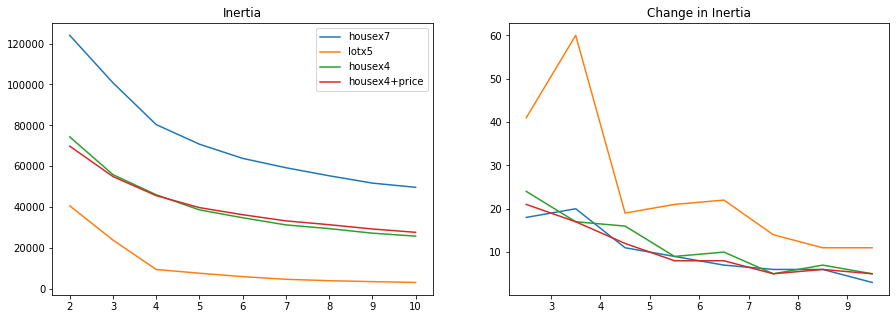

In [89]:
y=np.array([124059,100828,80362,70769,63824,59248,55304,51716,49649])
m=np.array([74334,55854,46010,38605,34758,31258,29435,27197,25757])
z=np.array([40587,23826,9420,7598,5931,4621,3932,3483,3079])
p=np.array([69798,54929,45584,39716,36240,33224,31353,29261,27625])

fig=plt.figure(figsize=(15,5))
ax=fig.add_subplot(121)

x=np.linspace(2,y.size+1,y.size)
ax.plot(x,y,label='housex7')
ax.plot(x,z,label='lotx5')
ax.plot(x,m,label='housex4')
ax.plot(x,p,label='housex4+price')
ax.set_title('Inertia')
plt.legend()

def pltChange(x,y,ax):
    for l in range(y.size-1):
        y[l]=100*(y[l]-y[l+1])/y[l]
    y=np.delete(y,y.size-1)
    ax.plot(x,y)
    return y


ax=fig.add_subplot(122)
x=np.linspace(x[0]+(x[1]-x[0])/2,y.size+1-(x[1]-x[0])/2,y.size-1)
y=pltChange(x,y,ax)
z=pltChange(x,z,ax)
m=pltChange(x,m,ax)
p=pltChange(x,p,ax)
ax.set_title('Change in Inertia')


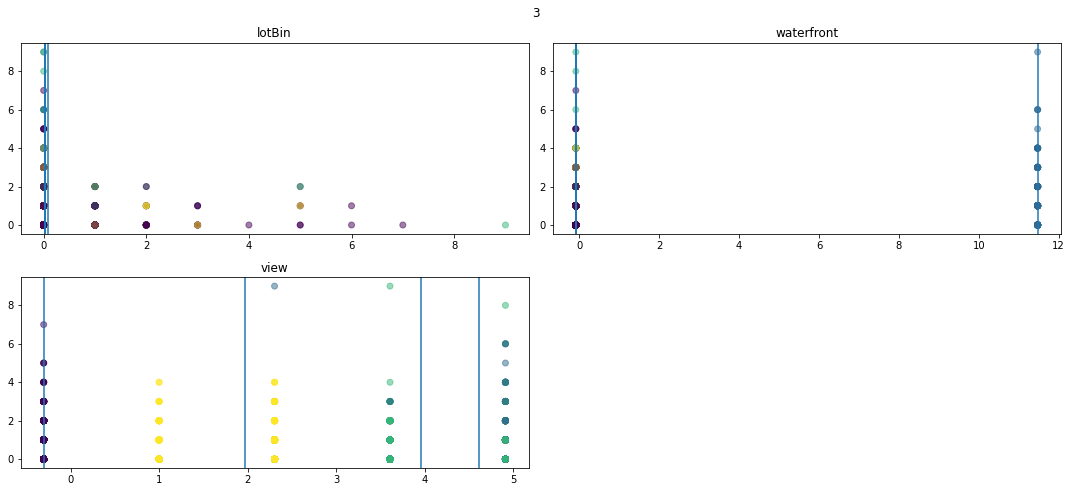

In [567]:
#Cluster houses by lot attributes

%matplotlib inline
numClusters=4
kmeans=KMeans(n_clusters=numClusters).fit(d.loc[:,lot])
numPlts=3
cntr=1
fig=plt.figure(figsize=(15,10))
for l in lot:
    ax=fig.add_subplot(3,2,cntr)
    ax.scatter(d.loc[:,l],priceBin,c=kmeans.labels_,alpha=0.5)
    for n in range(numClusters):
        ax.axvline(x=kmeans.cluster_centers_[n][cntr-1])
        pass
    cntr=cntr+1
    ax.set_title(l)
fig.suptitle(n)
fig.tight_layout()
plt.show()
d['lotclass']=kmeans.labels_

In [568]:
# Reorder labels to match mean price
def reorder(data, cname):
    m=data.loc[:,['price',cname]].groupby(by=cname).mean()
    s=m.loc[:,'price'].size
    for cntr in range(s):
        x=m.loc[:,'price'].idxmin()
        data[cname][:][data.loc[:,cname]==x]=cntr+s
        m=m.drop(index=x)
    data.loc[:,cname]=data.loc[:,cname]-s
    return data

d=reorder(d,'lotclass')
d.groupby(by='lotclass').mean()
d=reorder(d,'houseclass')
d.groupby(by='houseclass').mean()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,...,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,yr_since,lotclass
houseclass,,,,,,,,,,,,,,,,,,,,,
0,-0.536607,-1.085315,-1.329399,-1.048100,-0.093542,-0.771281,-0.037032,-0.172228,0.084088,-0.931113,...,-0.471638,-0.826848,-0.857599,0.421944,0.028090,-0.388682,-0.796098,-0.107022,0.857599,0.064557
1,-0.329657,-0.138126,-0.423168,-0.484085,0.006419,-0.760881,-0.059615,-0.143695,0.213118,-0.407446,...,-0.286260,-0.311238,-0.339240,-0.071974,-0.120286,-0.025605,-0.349694,0.016893,0.339240,0.076290
2,-0.236887,-0.552757,0.271475,-0.430564,-0.175791,1.244752,-0.008857,-0.127714,-0.383546,0.024139,...,-0.447592,0.703979,0.708398,0.059555,0.056524,-0.055452,-0.382408,-0.200457,-0.708398,0.084694
3,0.057539,0.533616,0.161399,0.298740,-0.032874,-0.757211,0.015914,0.185238,0.451404,-0.100737,...,1.447986,-0.376570,-0.356428,0.125245,0.143618,-0.255285,0.063993,-0.027857,0.356428,0.231884
4,0.157096,0.569112,0.540075,0.552585,0.051531,0.871407,-0.016898,-0.079165,-0.306285,0.574107,...,-0.554777,0.624687,0.629146,-0.349223,-0.171097,0.478381,0.612507,0.079779,-0.629146,0.107733
5,1.550572,0.985969,1.542701,2.033099,0.569098,0.966687,0.128270,0.258547,-0.377113,1.808637,...,-0.522070,0.815558,0.806826,-0.402962,0.192548,0.699363,1.728976,0.537762,-0.806826,0.261883
6,1.770737,1.295017,1.722383,2.088197,0.191679,0.554750,0.305379,1.071823,-0.021739,1.425148,...,2.140128,0.281109,0.426517,-0.090455,0.229270,0.018758,1.294004,0.176642,-0.426517,0.650000


Text(0.5, 0.98, 'House and Lot classes vs Price')

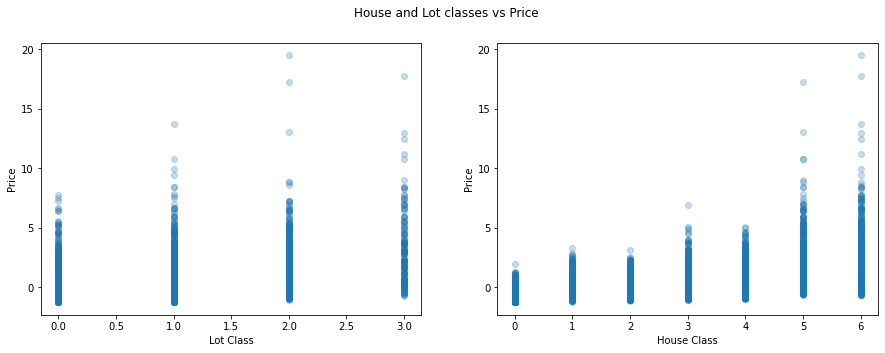

In [562]:
fig=plt.figure(figsize=(15,5))
ax=fig.add_subplot(121)
ax.scatter(d.loc[:,'lotclass'],d.loc[:,'price'],alpha=0.25)
ax.set_xlabel('Lot Class')
ax.set_ylabel('Price')
ax=fig.add_subplot(122)
ax.scatter(d.loc[:,'houseclass'],d.loc[:,'price'],alpha=0.25)
ax.set_xlabel('House Class')
ax.set_ylabel('Price')
fig.suptitle('House and Lot classes vs Price')

houseclass,0,1,2,3,4,5,6
lotclass,,,,,,,
0,-0.554558,-0.358524,-0.279948,-0.056019,0.104384,1.295478,1.259732
1,-0.234064,0.111577,0.274041,0.398585,0.582104,2.156083,1.879145
2,-0.064630,0.137442,0.772355,0.853413,0.931878,3.087864,2.445946
3,0.050776,0.701276,0.941729,2.219465,2.223507,5.261615,6.581168


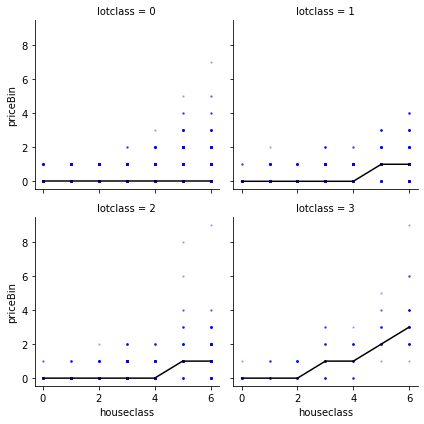

In [569]:
def fit(x,y,**kwargs):
    y=y.astype(int)
    plt.scatter(x,y,s=2,alpha=0.25,c='blue')
    cntr=0
    p=x.unique().copy()
    for X in np.sort(x.unique()):
        p[cntr]=y[x==X].mean()
        cntr=cntr+1
    plt.plot(np.sort(x.unique()),p,c='black')
    

g=sns.FacetGrid(d,col='lotclass',col_wrap=2)
g=g.map(fit,'houseclass','priceBin')
pd.pivot_table(d,values='price',index=['lotclass'],columns=['houseclass'],aggfunc=np.mean)

In [70]:
# Creates plots demonstrating why outliers were changed

def showOutlier():
    %matplotlib inline
    fig=plt.figure(figsize=(15,5))
    ax1=fig.add_subplot(111)
    x=data_orig.loc[:,'bedrooms']
    y=data_orig.loc[:,'bathrooms']
    ax1.scatter(x,y)
    ax1.set_xlabel('Bedrooms\n\nFrom Number of bathrooms, we can resonably assume 33 bedrooms was a typo, and should be 3')
    ax1.set_ylabel('Bathrooms')
    ax1.set_title('Bedrooms vs. Bathrooms, Looking for outlying data points')       
    Y=y[f].values[0]
    ax1.axhline(y=Y)
    X=x[y==Y].mean()
    ax1.axvline(x=X)
    ax1.annotate(text='('+str(np.round(X,2))+', '+str(Y)+')',xy=(X,Y),xytext=(15,6),arrowprops=dict(arrowstyle="->"))

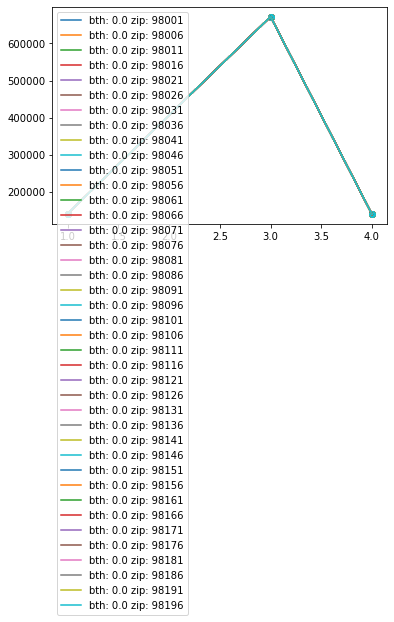

In [374]:
def pltCondPrice(data):
    f=data.loc[:,'condition']
    x=np.sort(data.loc[:,'condition'].unique())
    y=x.copy()
    for c in x:
        y[x==c]=data.loc[:,'price'][f==c].mean()
    return x,y

for b in np.sort(d.loc[:,'bedrooms'].unique())[0:1]:
    for bth in np.sort(d.loc[:,'fullBaths'].unique())[0:1]:
        f=(d.loc[:,'bedrooms']==b)&(d.loc[:,'fullBaths']==bth)
        for zc in range(d.loc[:,'zipcode'].min(),d.loc[:,'zipcode'].max(),5):
                f1= (d.loc[:,'zipcode']>=zc) | (d.loc[:,'zipcode']<(zc+5))
                x,y=pltCondPrice(d[(f1)&(f)])
                txt='bth: '+str(bth)+ ' zip: '+str(zc)
                plt.plot(x,y,label=txt)
                plt.scatter(x,y)
    plt.legend()
    plt.show()
    


In [545]:
def relhist(x,**kwargs):
    plt.hist(x,density=True)

In [73]:
def binn(data,numBins=10):
    r=(data.max()-data.min())/numBins
    t=data.min()
    for x in range(numBins):
        b=t
        t=b+r
        data[(data >=b)&(data <t)]=b+(t-b)/2
    data[data==t]=b+(t-b)/2
    return data


IntSlider(value=1, continuous_update=False, description='$\\omega$', max=10)

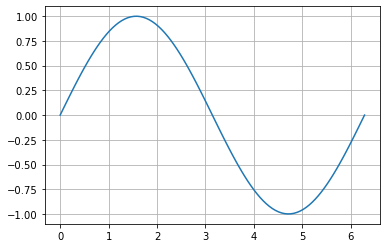